In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# loading the dataset
train = pd.read_csv("aug_train.csv")
test = pd.read_csv("aug_test.csv")

# saving a copy of the dataset
train_copy = train.copy()
test_copy = test.copy()

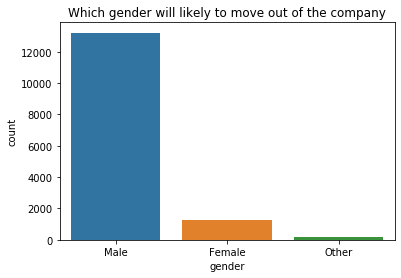

In [6]:
# first lets see which gender is likely to move out of the company

plt.title('Which gender will likely to move out of the company')
sns.countplot(train['gender'])
plt.show()

Text(0.5, 1.0, 'Gender percentage looking for new job')

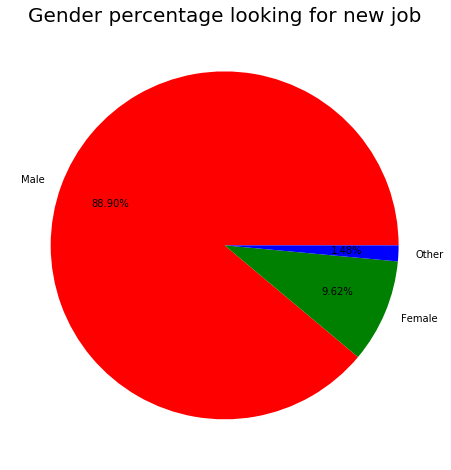

In [7]:
gender = train[train['target'] == 1]['gender']

gender_temp = gender.value_counts()
labels = gender_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = gender_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%",pctdistance=0.7)

plt.title('Gender percentage looking for new job', fontsize=20)

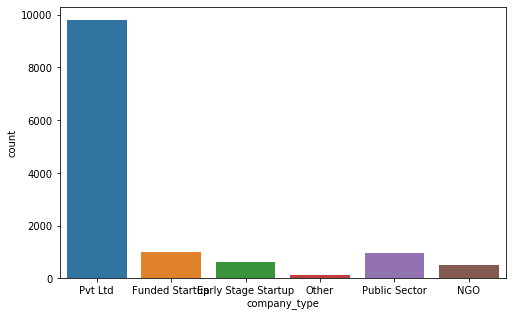

In [8]:
# From which company people are leaving and looking for a job the most

plt.figure(figsize=(8,5))
sns.countplot(train['company_type'])
plt.show()

Text(0.5, 1.0, 'People percentage leaving the company')

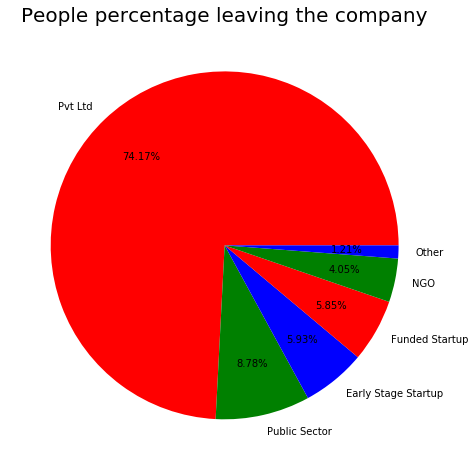

In [9]:
company = train[train['target'] == 1]['company_type']

company_temp = company.value_counts()
labels = company_temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = company_temp, labels = labels , colors = ['red','green','blue'], 
   autopct="%.2f%%",pctdistance=0.7)

plt.title('People percentage leaving the company', fontsize=20)

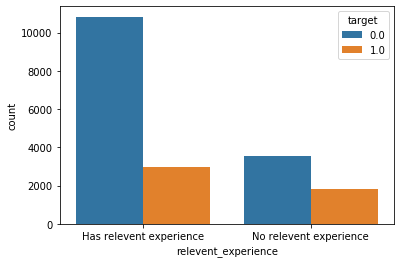

In [10]:
# Relevant experience based on target

sns.countplot(train['relevent_experience'], hue=train['target'])

In [11]:
# distribution of categorical cols vs target

categorical_cols_to_distribute = ['enrolled_university', 'education_level', 'major_discipline', 
                                  'experience', 'company_size', 'company_type', 'last_new_job']

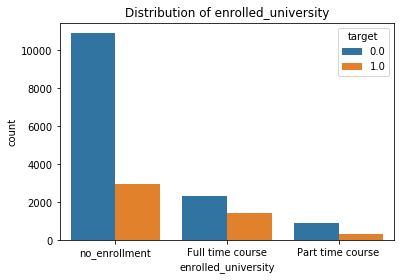

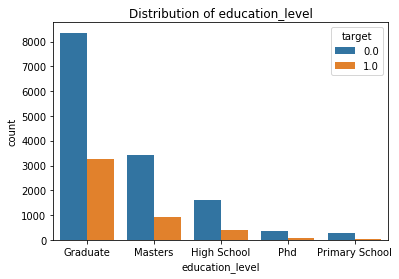

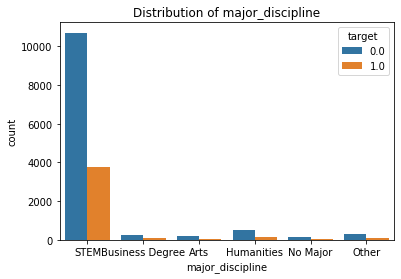

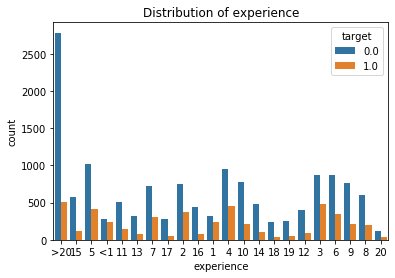

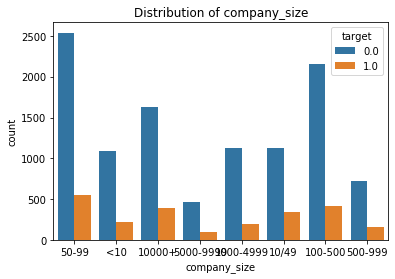

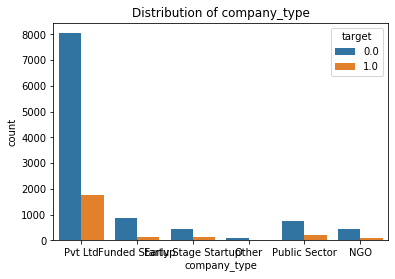

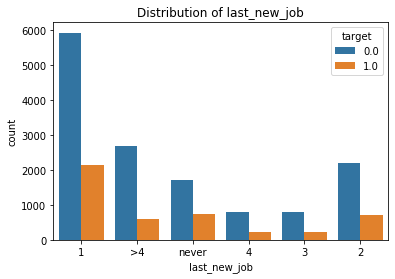

In [12]:
for col in train[categorical_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.countplot(train[col], hue=train['target'])
    plt.show()

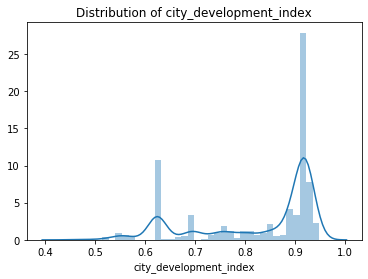

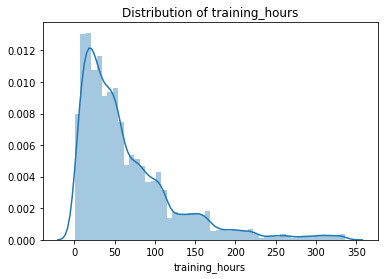

In [13]:
# distribution of numeric cols vs target

numeric_cols_to_distribute = ['city_development_index', 'training_hours']

for col in train[numeric_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.distplot(train[col])
    plt.show()

### pre-processing

In [14]:
# first lets drop the non-prominent columns

train.drop(['enrollee_id', 'city'], axis=1, inplace=True)
test.drop(['enrollee_id', 'city'], axis=1, inplace=True)

In [15]:
# lets fill in missing values with their mode

cols_with_na = ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 
               'company_size', 'company_type', 'last_new_job']

In [16]:
for col in cols_with_na:
    train[col].fillna(train[col].mode()[0],inplace=True)
    
for col in cols_with_na:
    test[col].fillna(test[col].mode()[0],inplace=True)

In [17]:
# now lets change categorical features to numeric features using dictionary mapping

train.select_dtypes(object)

,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
1,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never
4,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4
...,...,...,...,...,...,...,...,...,...
19153,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1
19154,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4
19155,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4
19156,Male,Has relevent experience,no_enrollment,High School,STEM,<1,500-999,Pvt Ltd,2


In [18]:
train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [19]:
# mapping

gender_mapping = {'Male':0, 'Female':1, 'Other':2}

relevent_experience_mapping = {'No relevent experience':0, 'Has relevent experience':1}

enrolled_university_mapping = {'no_enrollment':0, 'Full time course':1, 'Part time course':2}

education_level_mapping = {'Graduate':0, 'Masters':1, 'High School':2, 'Phd':3, 'Primary School':4}

major_discipline_mapping = {'STEM':0, 'Business Degree':1, 'Arts':2, 'Humanities':3, 'No Major':4, 'Other':5}

experience_mapping = {'15':15, '5':5, '<1':0, '>20':21, '11':11, '13':13, '7':7, '17':17, '2':2, '16':16,
                      '1':1, '4':4,'10':10, '14':14, '18':18, '19':19, '12':12, '3':3, '6':6, '9':9, '8':8, '20':20}

company_size_mapping = {'50-99':0, '<10':1, '10000+':2, '5000-9999':3, '1000-4999':4, '10/49':5, '100-500':6, '500-999':7}

company_type_mapping = {'Pvt Ltd':0, 'Funded Startup':1, 'Early Stage Startup':2, 'Other':3, 'Public Sector':4, 'NGO':5}

last_new_job_mapping = {'>4':5, 'never':0, '4':4, '1':1, '3':3, '2':2}

In [20]:
train['gender'] = train['gender'].map(gender_mapping)
train['relevent_experience'] = train['relevent_experience'].map(relevent_experience_mapping)
train['enrolled_university'] = train['enrolled_university'].map(enrolled_university_mapping)
train['education_level'] = train['education_level'].map(education_level_mapping)
train['major_discipline'] = train['major_discipline'].map(major_discipline_mapping)
train['experience'] = train['experience'].map(experience_mapping)
train['company_size'] = train['company_size'].map(company_size_mapping)
train['company_type'] = train['company_type'].map(company_type_mapping)
train['last_new_job'] = train['last_new_job'].map(last_new_job_mapping)

In [21]:
test['gender'] = test['gender'].map(gender_mapping)
test['relevent_experience'] = test['relevent_experience'].map(relevent_experience_mapping)
test['enrolled_university'] = test['enrolled_university'].map(enrolled_university_mapping)
test['education_level'] = test['education_level'].map(education_level_mapping)
test['major_discipline'] = test['major_discipline'].map(major_discipline_mapping)
test['experience'] = test['experience'].map(experience_mapping)
test['company_size'] = test['company_size'].map(company_size_mapping)
test['company_type'] = test['company_type'].map(company_type_mapping)
test['last_new_job'] = test['last_new_job'].map(last_new_job_mapping)

### defining the independent and the dependent variable

In [22]:
x_train = train.drop('target', axis=1)
y_train = train['target']

x_test = test

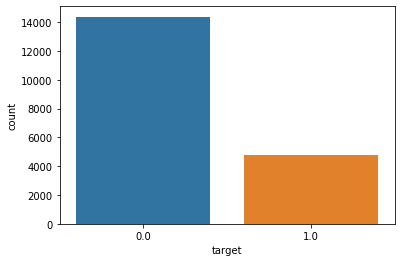

In [23]:
# lets check for imbalance in the data and balance it with smote

from imblearn.over_sampling import SMOTE

sns.countplot(y_train)

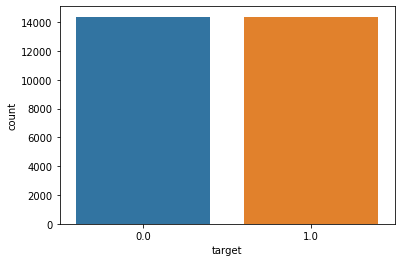

In [24]:
# clearly 0.0 is greater then 1.0 - lets fix this by balancing them

smote = SMOTE(random_state=56)

x_train, y_train = smote.fit_resample(x_train, y_train)
sns.countplot(y_train)

In [26]:
# Model Building and training

from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
# predictions

pred = model.predict(x_test)
pred

array([0., 0., 1., ..., 0., 0., 0.])

In [28]:
# accuracy

model.score(x_train, y_train)

0.8773381545094222